In [1]:
from my_ANN import initialize_params, forward, compute_cost, backward, update_params

import numpy as np
import matplotlib.pyplot as plt
import time

# File H5

In [2]:
import h5py

h5_fileName1 = 'train_catvnoncat.h5'
h5_fileName2 = 'test_catvnoncat.h5'

train_dataset = h5py.File(h5_fileName1, 'r')
test_dataset = h5py.File(h5_fileName2, 'r')

In [3]:
for item in train_dataset.keys():
    print(item, ':', train_dataset[item])

list_classes : <HDF5 dataset "list_classes": shape (2,), type "|S7">
train_set_x : <HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
train_set_y : <HDF5 dataset "train_set_y": shape (209,), type "<i8">


In [4]:
for item in test_dataset.keys():
    print(item, ':', test_dataset[item])

list_classes : <HDF5 dataset "list_classes": shape (2,), type "|S7">
test_set_x : <HDF5 dataset "test_set_x": shape (50, 64, 64, 3), type "|u1">
test_set_y : <HDF5 dataset "test_set_y": shape (50,), type "<i8">


In [5]:
classes = np.array(test_dataset["list_classes"])
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [6]:
X_train, Y_train = np.array(train_dataset["train_set_x"]), np.array(train_dataset["train_set_y"])
X_test, Y_test = np.array(test_dataset["test_set_x"]), np.array(test_dataset["test_set_y"])

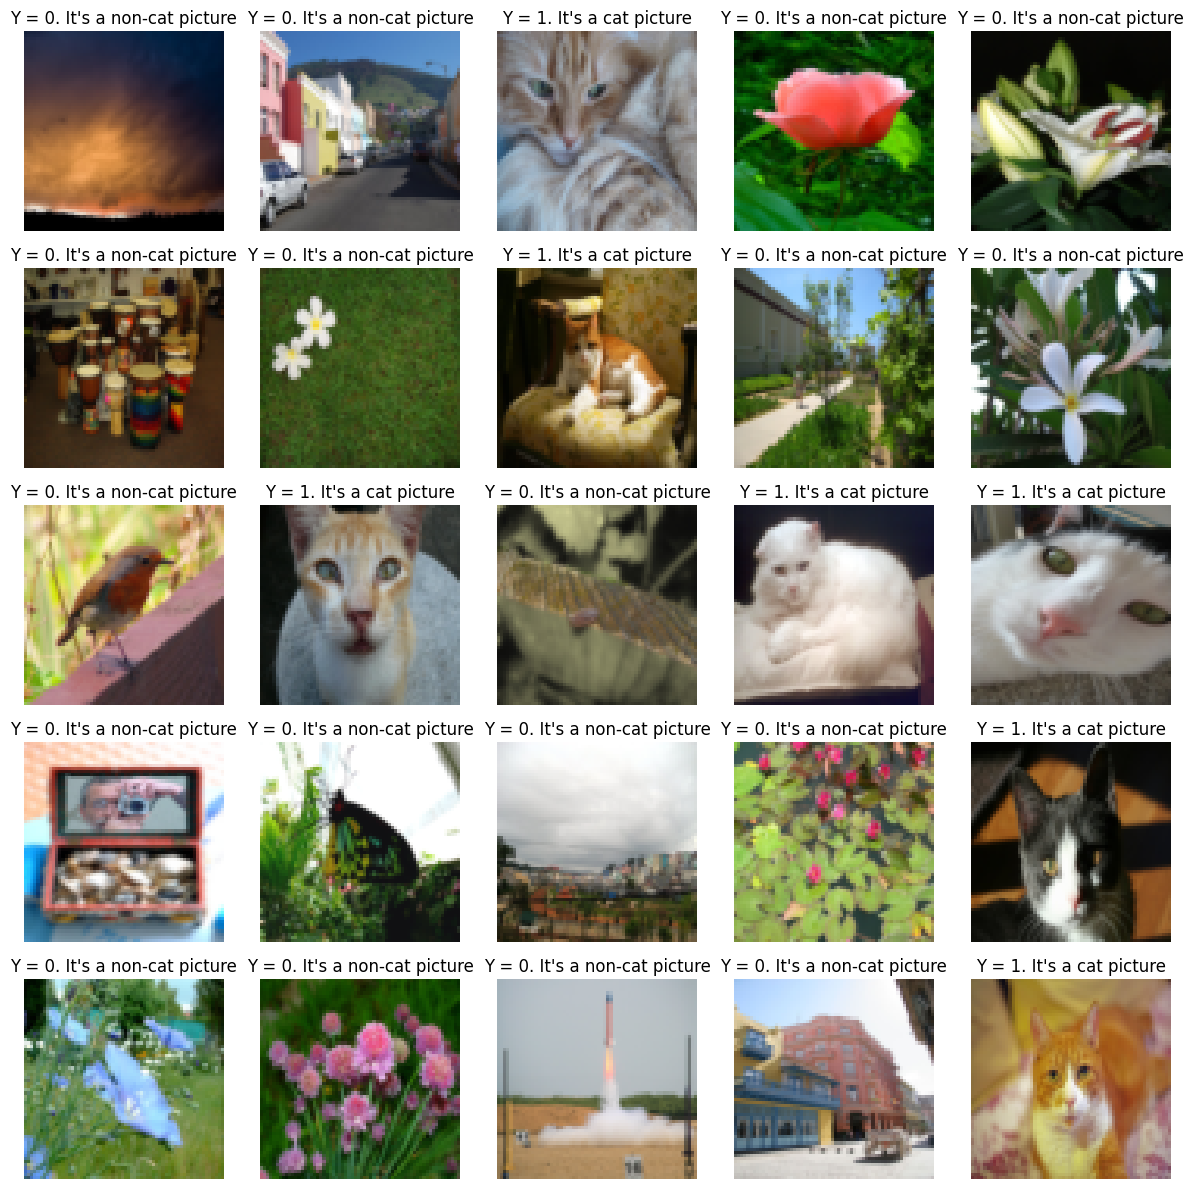

In [7]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.flatten()

for idx in range(len(axes)):
    axes[idx].imshow(X_train[idx])
    axes[idx].set_title(f"Y = {Y_train[idx]}. It's a {classes[Y_train[idx]].decode('utf-8')} picture")
    axes[idx].axis('off')  # Hide the axes

# Remove any empty subplots
for remaining_idx in range(idx+1, len(axes)):
    fig.delaxes(axes[remaining_idx])

plt.tight_layout()
plt.show()

# Preprocessing

In [8]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1).T
X_test_flattened = X_test.reshape(X_test.shape[0], -1).T

X_train_flattened.shape, X_test_flattened.shape

((12288, 209), (12288, 50))

In [9]:
X_train_scaled = X_train_flattened / 255
X_test_scaled = X_test_flattened / 255

# Model with 2 layers

### Training

In [10]:
n_features = X_train_flattened.shape[0]
units_each_layer = [n_features, 7, 1]

params = initialize_params(units_each_layer)
for i in params.keys():
    print(i, params[i].shape )

W1 (7, 12288)
B1 (7, 1)
W2 (1, 7)
B2 (1, 1)


In [11]:
Y_pred, caches = forward(X_train_scaled, params)
Y_pred.shape

(1, 209)

In [12]:
grads = backward(Y_train, Y_pred, caches)
for i in grads.keys():
    print(i, grads[i].shape)

dA1 (7, 209)
dW2 (1, 7)
dB2 (1, 1)
dA0 (12288, 209)
dW1 (7, 12288)
dB1 (7, 1)


In [13]:
def my_model(X_train, Y_train, layers, learning_rate=0.0075, iterations=3000):
    costs = []

    np.random.seed(1)
    params = initialize_params(layers)
    
    # training
    for i in range(1, iterations+1):
        # forward pass
        Y_pred, caches = forward(X_train, params)
        # compute cost
        cost = compute_cost(Y_pred, Y_train)
        costs.append(cost)
        # backward pass to compute gradients
        grads = backward(Y_train, Y_pred, caches)
        # update parameters
        params = update_params(params, grads, learning_rate)

        # print cost
        if i % 100 == 0 or i == 1:
            print('Cost after Iteration {}: {}'.format(i, cost))

    return params, costs

In [14]:
start = time.time()
params, costs = my_model(X_train_scaled, Y_train.reshape(1, -1), layers=units_each_layer, learning_rate=0.0075, iterations=2500)
end = time.time()
print('-'*100)
print('RUNNING TIME: {} ms'.format(end - start))

Cost after Iteration 1: 0.6950464961800915
Cost after Iteration 100: 0.5898293392875595
Cost after Iteration 200: 0.5246770984206754
Cost after Iteration 300: 0.44949806135921655
Cost after Iteration 400: 0.4013314531980598
Cost after Iteration 500: 0.3629682587841332
Cost after Iteration 600: 0.3331921860955135
Cost after Iteration 700: 0.300569270767676
Cost after Iteration 800: 0.2542938717649781
Cost after Iteration 900: 0.21591228706996826
Cost after Iteration 1000: 0.1438379357895547
Cost after Iteration 1100: 0.40086895377476156
Cost after Iteration 1200: 0.09513384924619718
Cost after Iteration 1300: 0.0802973906494831
Cost after Iteration 1400: 0.06940282493578838
Cost after Iteration 1500: 0.06027874181523458
Cost after Iteration 1600: 0.053321166590581386
Cost after Iteration 1700: 0.047726600330008744
Cost after Iteration 1800: 0.043055200715065425
Cost after Iteration 1900: 0.03901407260733287
Cost after Iteration 2000: 0.03575604710653168
Cost after Iteration 2100: 0.0329

**Expected Output**:
<table> 
    <tr>
        <td> <b>Cost after iteration 0</b></td>
        <td> 0.6930497356599888 </td>
    </tr>
    <tr>
        <td> <b>Cost after iteration 100</b></td>
        <td> 0.6464320953428849 </td>
    </tr>
    <tr>
        <td> <b>...</b></td>
        <td> ... </td>
    </tr>
    <tr>
        <td> <b>Cost after iteration 2499</b></td>
        <td> 0.04421498215868956 </td>
    </tr>
</table>

### Predicting

In [15]:
def predict(X, params):
    Y_pred, _ = forward(X, params)
    Y_pred = np.where(Y_pred > 0.5, 1, 0)
    return Y_pred

In [16]:
def score(Y, Y_pred):
    """
    Y: (n_samples, )
    Y_pred: (n_samples, )
    """
    n_samples = len(Y)
    diff = (Y == Y_pred).astype('int')
    accuracy = np.sum(diff) / n_samples
    return accuracy

In [17]:
Y_trainPred = predict(X_train_scaled, params)
Y_trainPred = Y_trainPred.reshape(-1, )

diff = (Y_trainPred == Y_train)
np.unique(diff, return_counts=True)

(array([ True]), array([209], dtype=int64))

In [18]:
score(Y_train, Y_trainPred)

1.0

**Expected Output**:
<table> 
    <tr>
        <td> <b>Accuracy</b></td>
        <td> 0.9999999999999998 </td>
    </tr>
</table>

In [19]:
Y_testPred = predict(X_test_scaled, params)
Y_testPred = Y_testPred.reshape(-1, )

diff = (Y_test == Y_testPred)
np.unique(diff, return_counts=True)

(array([False,  True]), array([13, 37], dtype=int64))

In [20]:
score(Y_test, Y_testPred)

0.74

**Expected Output**:

<table> 
    <tr>
        <td> <b>Accuracy</b></td>
        <td> 0.72 </td>
    </tr>
</table>

# Model with 4 layers

In [21]:
units_each_layer = [n_features, 20, 7, 5, 1]

In [22]:
start = time.time()
params, costs = my_model(X_train_scaled, Y_train.reshape(1, -1), layers=units_each_layer, learning_rate=0.0075, iterations=2500)
end = time.time()
print('-'*100)
print('RUNNING TIME: {} ms'.format(end - start))

Cost after Iteration 1: 0.7717493284237686
Cost after Iteration 100: 0.672387778839432
Cost after Iteration 200: 0.6457504599239202
Cost after Iteration 300: 0.6278240987145455
Cost after Iteration 400: 0.5973174735777875
Cost after Iteration 500: 0.5215481648818989
Cost after Iteration 600: 0.4831283038044844
Cost after Iteration 700: 0.43009700248256333
Cost after Iteration 800: 0.3645331374952562
Cost after Iteration 900: 0.3431782227004086
Cost after Iteration 1000: 0.29340974092684036
Cost after Iteration 1100: 0.2550264224461813
Cost after Iteration 1200: 0.22804390297234778
Cost after Iteration 1300: 0.19705590943913695
Cost after Iteration 1400: 0.18372326192685945
Cost after Iteration 1500: 0.1609978212526493
Cost after Iteration 1600: 0.14842406171000475
Cost after Iteration 1700: 0.13803169458234898
Cost after Iteration 1800: 0.12872614943352845
Cost after Iteration 1900: 0.12086572709077906
Cost after Iteration 2000: 0.11426760382035103
Cost after Iteration 2100: 0.10850013

**Expected Output**:
<table> 
    <tr>
        <td> <b>Cost after iteration 0</b></td>
        <td> 0.771749 </td>
    </tr>
    <tr>
        <td> <b>Cost after iteration 100</b></td>
        <td> 0.672053 </td>
    </tr>
    <tr>
        <td> <b>...</b></td>
        <td> ... </td>
    </tr>
    <tr>
        <td> <b>Cost after iteration 2499</b></td>
        <td> 0.088439 </td>
    </tr>
</table>

In [23]:
Y_trainPred = predict(X_train_scaled, params)
Y_trainPred = Y_trainPred.reshape(-1, )

diff = (Y_trainPred == Y_train)
np.unique(diff, return_counts=True)

(array([False,  True]), array([  3, 206], dtype=int64))

In [24]:
score(Y_train, Y_trainPred)

0.9856459330143541

**Expected Output**:

<table>
    <tr>
    <td>
        <b>Train Accuracy</b>
    </td>
    <td>
    0.985645933014
    </td>
    </tr>
</table>

In [25]:
Y_testPred = predict(X_test_scaled, params)
Y_testPred = Y_testPred.reshape(-1, )

diff = (Y_test == Y_testPred)
np.unique(diff, return_counts=True)

(array([False,  True]), array([10, 40], dtype=int64))

In [26]:
score(Y_test, Y_testPred)

0.8

**Expected Output**:

<table> 
    <tr>
        <td> <b>Test Accuracy</b></td>
        <td> 0.8 </td>
    </tr>
</table>

# Visualizing Mislabeled Images

In [27]:
mislabeled_indices = np.where(diff == False)  # returns indices of diff where diff == False
mislabeled_indices  # a list with 2 elements

(array([ 5, 11, 13, 19, 28, 29, 34, 38, 44, 45], dtype=int64),)

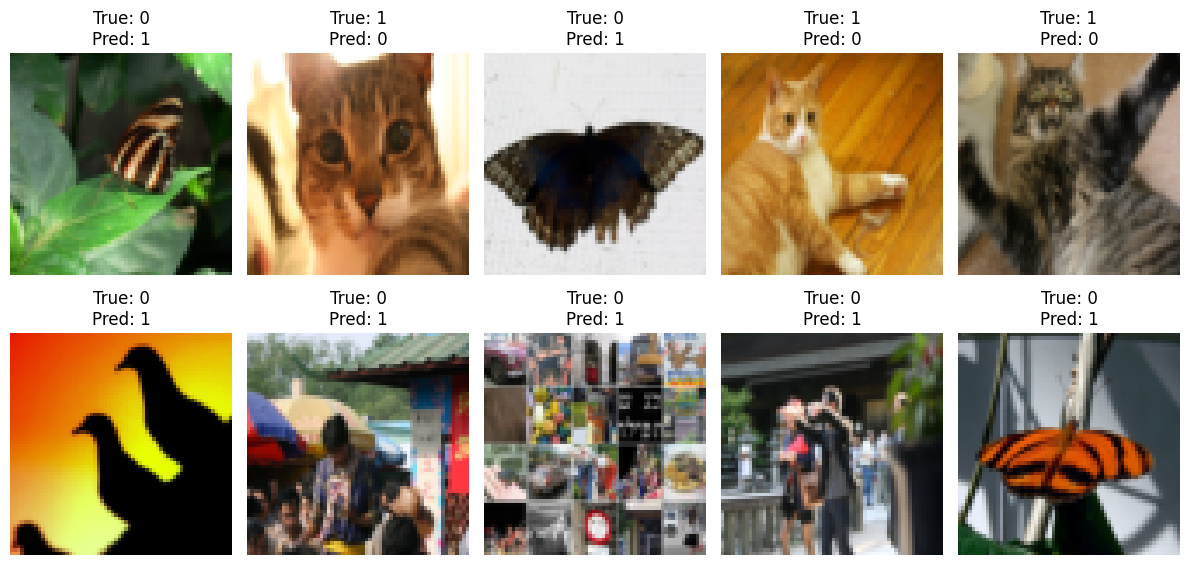

In [28]:
n_mislabeled_imgs = len(mislabeled_indices[0])

fig, axes = plt.subplots(2, 5, figsize=(12,6))
axes = axes.flatten()

for i, img_idx in enumerate(mislabeled_indices[0]):
    axes[i].imshow(X_test[img_idx])
    axes[i].set_title(f'True: {Y_test[img_idx]}\nPred: {Y_testPred[img_idx]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()